<a href="https://colab.research.google.com/github/manojkhara/data-science-lab/blob/main/week-3/pytorch/Autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchviz

In [ ]:
import torch
from torchviz import make_dot

In [ ]:
z = torch.tensor(3.0, requires_grad=True)
z

tensor(3., requires_grad=True)

In [ ]:
y = z**2
y

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
y.backward() # gradients have been computed

In [ ]:
z.grad  # 2*z

tensor(6.)

# Gradient accumulation and clearing the gradients

In [ ]:
y = z**2 # Z=3
y.backward()
print(z.grad)
z.grad.zero_() # clear the gradient


tensor(6.)


tensor(0.)

# Update the leaf variable values

In [ ]:
z.is_leaf

True

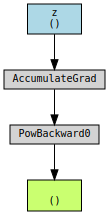

In [ ]:
make_dot(y, params={"z": z})

In [ ]:
learning_rate = 0.2
z -= learning_rate * z.grad

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [ ]:
y = z**2 # Z=3
y.backward()
print(z.grad)

tensor(6.)


In [ ]:
with torch.no_grad():
  z -= 0.2 * z.grad
# z.grad.zero_()

In [ ]:
z

tensor(1.8000, requires_grad=True)

# A simple training loop

In [ ]:
w = torch.tensor(2.0, requires_grad=True) # weight
x = torch.tensor(3.0, requires_grad=False) # input
b = torch.tensor(1.0, requires_grad=True) # bias
y_hat = w*x + b
y_hat

tensor(7., grad_fn=<AddBackward0>)

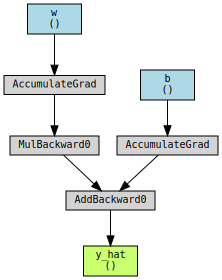

In [ ]:
make_dot(y_hat, params={"w": w, "b": b, "y_hat": y_hat})

In [ ]:
x = torch.tensor(3.0, requires_grad=False)
y = torch.tensor(1.0, requires_grad=False) # label given

w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

for i in range(10):
  # forward pass
  y_hat = w*x + b

  # compute loss

  loss = (y_hat - y)**2 # squared error

  print(i, f"w = {w.data} , b= {b.data}")
  print("loss=",loss)
  print()

  #backward pass
  loss.backward()

  # #gradients

  learning_rate= 0.01
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

  w.grad.zero_(), b.grad.zero_()

0 w = 2.0 , b= 1.0
loss= tensor(36., grad_fn=<PowBackward0>)

1 w = 1.6399999856948853 , b= 0.8799999952316284
loss= tensor(23.0400, grad_fn=<PowBackward0>)

2 w = 1.3519999980926514 , b= 0.7839999794960022
loss= tensor(14.7456, grad_fn=<PowBackward0>)

3 w = 1.1216000318527222 , b= 0.7071999907493591
loss= tensor(9.4372, grad_fn=<PowBackward0>)

4 w = 0.9372800588607788 , b= 0.6457599997520447
loss= tensor(6.0398, grad_fn=<PowBackward0>)

5 w = 0.7898240685462952 , b= 0.5966079831123352
loss= tensor(3.8655, grad_fn=<PowBackward0>)

6 w = 0.6718592643737793 , b= 0.5572863817214966
loss= tensor(2.4739, grad_fn=<PowBackward0>)

7 w = 0.5774874091148376 , b= 0.5258290767669678
loss= tensor(1.5833, grad_fn=<PowBackward0>)

8 w = 0.5019899606704712 , b= 0.5006632804870605
loss= tensor(1.0133, grad_fn=<PowBackward0>)

9 w = 0.4415919780731201 , b= 0.48053061962127686
loss= tensor(0.6485, grad_fn=<PowBackward0>)

